импорт всех нужных библиотек

In [2]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import QuantumTrainer,QuantumNeuralNetwork
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
PATH_TO = 'D:/pg/air/'
sys.path.append(os.path.abspath(PATH_TO))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [3]:
path = PATH_TO + 'data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [4]:
#инициализация модели
model = QuantumNeuralNetwork( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size = 64,
    device = device)

trainer = QuantumTrainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [5]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=64,
    epochs=200,
    loss_tube=5
)

Epoch 10
Train - Total: 0.924579, Main: 0.924579, Quantum: 0.000000, MAPE: 0.512554, Alpha: 0.715706
Test - MAPE: 0.519628, Tube: 0.076725
Epoch 100
Train - Total: 0.203255, Main: 0.203255, Quantum: 0.000000, MAPE: 0.096954, Alpha: 0.550499
Test - MAPE: 0.055373, Tube: 0.604781
Epoch 200
Train - Total: 0.135388, Main: 0.135388, Quantum: 0.000000, MAPE: 0.059933, Alpha: 0.533791
Test - MAPE: 0.048497, Tube: 0.629545


In [6]:
model.training = False

In [7]:
LV = LossVisualizer(history)

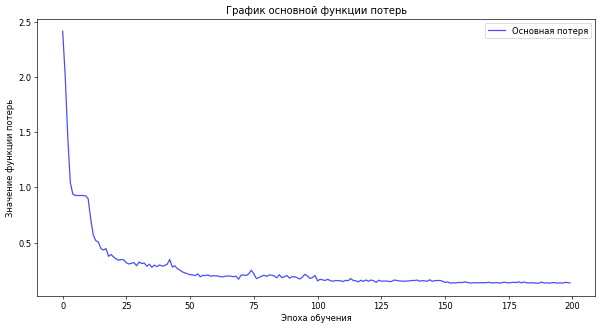

In [8]:
LV.show_training_loss()

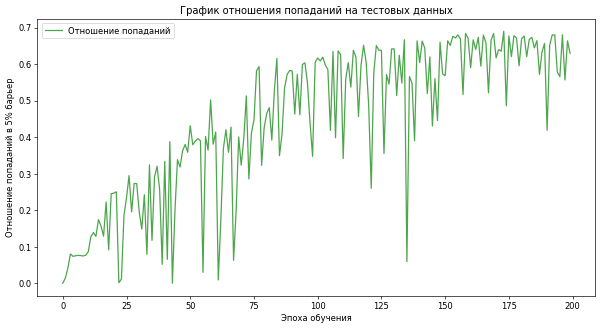

In [9]:
LV.show_test_tube()

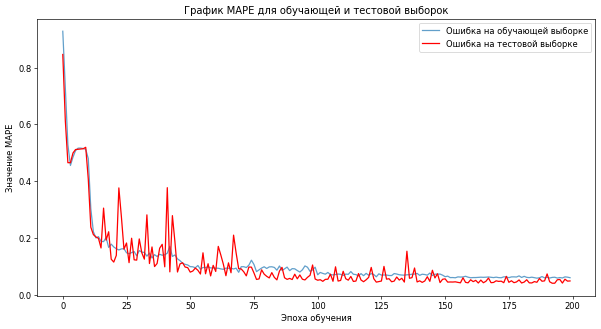

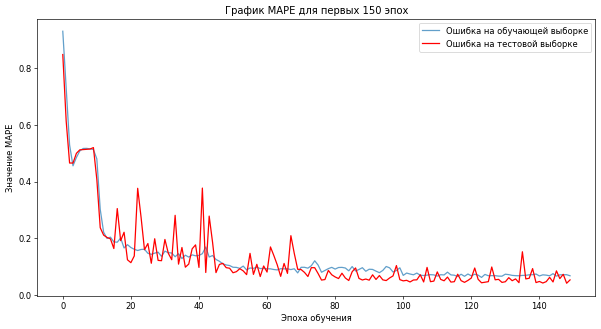

In [10]:
LV.show_mape()

In [11]:
X_test.shape

torch.Size([6986, 89])

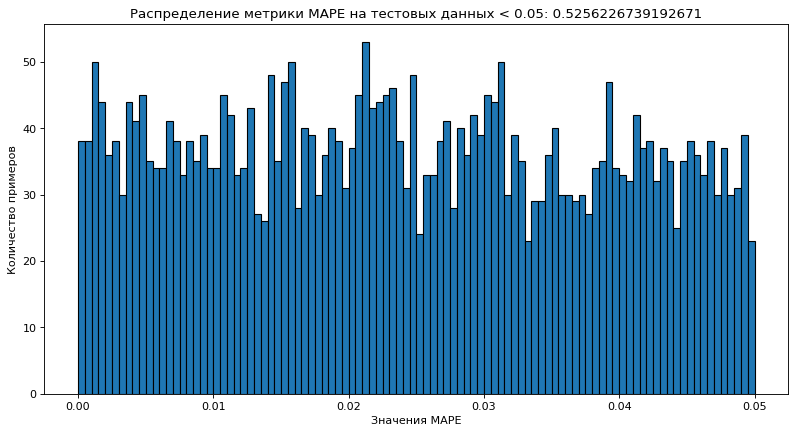

Процент значений MAPE < 0.05: 52.56%


In [12]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

In [11]:
LV.show_predictions(model,df,pd_params,device)

Количество записей: 5334


IndexError: too many indices for tensor of dimension 2